In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Define the number of replicas
num_replicas = 7

# Read the log data from the file
with open('log.lammps', 'r') as file:
    log_data = file.read()

# Extract the last occurrence of potential energies for each replica
replica_indices = []
potential_energies = []

# Regular expression to match the lines with potential energy data
pattern = re.compile(r'\s+\d+\s+[\d.]+\s+[\d.]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+[\d.e+-]+\s+([\d.e+-]+)\s+[\d.e+-]+\s+([\d.e+-]+)\s+[\d.e+-]+\s+([\d.e+-]+)\s+[\d.e+-]+\s+([\d.e+-]+)\s+[\d.e+-]+\s+([\d.e+-]+)\s+[\d.e+-]+\s+([\d.e+-]+)\s+[\d.e+-]+\s+([\d.e+-]+)')

matches = pattern.findall(log_data)
if matches:
    last_match = matches[-1]
    pe_values = [float(last_match[i]) for i in range(num_replicas)]
    replica_indices = list(range(1, num_replicas + 1))
    potential_energies = pe_values


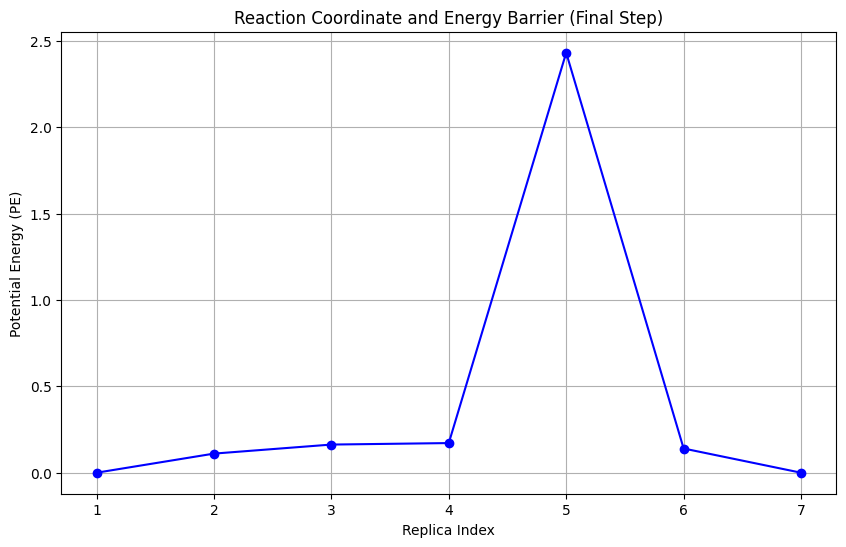

In [7]:

# Plot the reaction coordinate and energy barrier for the final step
plt.figure(figsize=(10, 6))
plt.plot(replica_indices, potential_energies-np.min(potential_energies), marker='o', linestyle='-', color='b')
plt.xlabel('Replica Index')
plt.ylabel('Potential Energy (PE)')
plt.title('Reaction Coordinate and Energy Barrier (Final Step)')
plt.grid(True)
plt.show()